# Part I - Ford GoBike System Data
## by Riga

## Introduction
## Preliminary Wrangling


In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

In [8]:
# find the path of the current working directory
os.chdir('.')
os.listdir('.')

['Part_II_slide_deck_template copy.ipynb',
 '.DS_Store',
 'Part_II_slide_deck_template.ipynb',
 'README.md',
 'fordgobike-tripdata.csv',
 '.ipynb_checkpoints',
 'Part_I_exploration_FordGoBikeSystemData.ipynb']

In [9]:
# load dataset
df = pd.read_csv('fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [10]:
# print the shape of the dataframe
df.shape

(183412, 16)

The dataset is consists of 183412 rows and 16 columns.

In [11]:
# check the missing values in the dataset
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

There are missing value in columns: 'start_station_id','start_station_name','end_station_id','end_station_name','member_birth_year','member_gender'.

In [12]:
# check the duplicates
df.duplicated().sum()

0

There is no duplicated rows.

In [13]:
# check the data types of the columns
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [14]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


array([[<AxesSubplot:title={'center':'duration_sec'}>,
        <AxesSubplot:title={'center':'start_station_id'}>,
        <AxesSubplot:title={'center':'start_station_latitude'}>],
       [<AxesSubplot:title={'center':'start_station_longitude'}>,
        <AxesSubplot:title={'center':'end_station_id'}>,
        <AxesSubplot:title={'center':'end_station_latitude'}>],
       [<AxesSubplot:title={'center':'end_station_longitude'}>,
        <AxesSubplot:title={'center':'bike_id'}>,
        <AxesSubplot:title={'center':'member_birth_year'}>]], dtype=object)

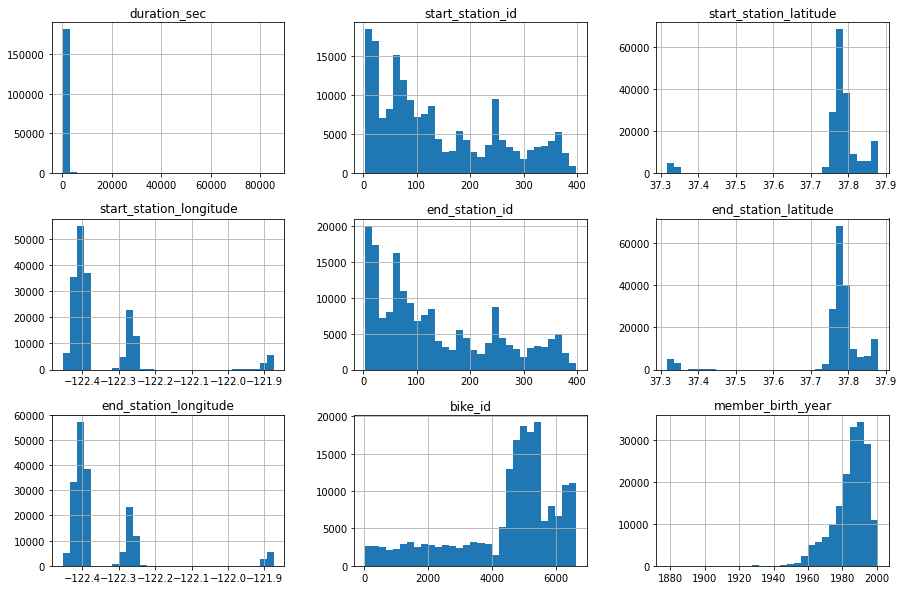

In [15]:
df.hist(bins=30, figsize=(15, 10))

The numeric columns are: duration_sec(int type), bike_id(int type), member_birth_year(float), start_station_id(float), end_station_id(float) and start and end latitude and longitude(float). Among them, start_station_id, end_station_id and member_birth_year should convert to int data type.

## 1. time related columns: 

In [16]:
# explore the object in start_time column
df.start_time.value_counts().head(10)

2019-02-19 17:52:44.1750    2
2019-02-07 09:06:07.0560    2
2019-02-01 13:40:09.4920    2
2019-02-07 17:56:08.8970    2
2019-02-15 08:43:18.4220    2
2019-02-01 18:24:34.8740    2
2019-02-22 20:11:42.2560    2
2019-02-06 21:35:57.5740    2
2019-02-15 07:47:00.1970    2
2019-02-11 17:05:07.8400    2
Name: start_time, dtype: int64

In [17]:
# explore the object in end_time column
df.end_time.value_counts().head(10)

2019-02-11 18:53:55.0820    2
2019-02-22 07:55:50.7860    2
2019-02-20 09:40:38.4500    2
2019-02-23 12:07:02.5700    2
2019-02-14 08:20:06.2300    2
2019-02-21 22:16:04.4780    2
2019-02-14 18:14:03.9280    2
2019-02-06 18:22:42.3790    2
2019-02-11 07:47:02.5560    2
2019-02-12 09:07:04.4750    2
Name: end_time, dtype: int64

## 2. station location related columns:

In [18]:
# explore the object in start_station_name column
df.start_station_name.value_counts().head(10)

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2710
San Francisco Caltrain (Townsend St at 4th St)               2703
Powell St BART Station (Market St at 5th St)                 2327
Howard St at Beale St                                        2293
Steuart St at Market St                                      2283
Name: start_station_name, dtype: int64

In [19]:
# explore the data in end_station_name column
df.end_station_name.value_counts().head(10)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
San Francisco Caltrain (Townsend St at 4th St)               2947
Berry St at 4th St                                           2872
The Embarcadero at Sansome St                                2512
Powell St BART Station (Market St at 5th St)                 2353
Steuart St at Market St                                      2338
Name: end_station_name, dtype: int64

## 3. personal information:

In [20]:
# explore the data in user_type
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [21]:
# show the value in member gender column
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [22]:
# show the value in bike_share_for_all_trip column
df.bike_share_for_all_trip.value_counts()


No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

The object data type columns contain the time related columns, station location columns and personal information columns,including user type (with option: Subscriber and Customer), member_gender(with option: Male and Female), bike_share_for_all_trip(with option: Yes and no).

### What is the structure of your dataset?

> The dataset is consists of 183412 rows and 16 columns. There are no duplicated rows, but it has missing values in columns: 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year', 'member_gender'. The numeric columns are: duration_sec(int), bike_id(int), member_birth_year(float), start_station_id(float), end_station_id(float) and start and end latitude and longitude(float). Among them, start_station_id, end_station_id and member_birth_year should convert to int data type. The object data type columns contain the time related columns, station location columns and personal information column, including user type (with option: Subscriber and Customer), member_gender(with option: Male and Female), bike_share_for_all_trip(with option: Yes and no).

### What is/are the main feature(s) of interest in your dataset?

> I'd like to explore the relation between the riding duration and user personal information(gender, age and user type), station locations. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The riding time represents by the column 'duration_sec'. The column 'member_gender', 'member_birth_year','user_type' provide the user personal information. And the station location relates columns are : 'start_station_name' and 'end_station_name'.

# Data cleaning:

In [23]:
# copy a dataset 
df_clean = df.copy()

## Issue1: drop the rows with missing values

In [24]:
# drop the missing values in column:'start_station_id','start_station_name',
# 'end_station_id','end_station_name','member_birth_year','member_gender'
df_clean = df_clean.dropna(subset=['start_station_id','start_station_name',
                                   'end_station_id','end_station_name','member_birth_year','member_gender'])


In [25]:
# test 
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

## Issue2: convert the start_station_id(float), end_station_id(float) to int data type

In [26]:
# convert the data type in start_station_id and end_station_id to int64
df_clean['start_station_id'] = df_clean['start_station_id'].astype('Int64')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('Int64')

In [27]:
# test
df_clean.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             Int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               Int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

## Issue3: convert the start_time and end_time into datatime

In [28]:
# convert the start_time and end_time column to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [29]:
# test
df['start_time'].value_counts().head(10)

2019-02-19 17:52:44.1750    2
2019-02-07 09:06:07.0560    2
2019-02-01 13:40:09.4920    2
2019-02-07 17:56:08.8970    2
2019-02-15 08:43:18.4220    2
2019-02-01 18:24:34.8740    2
2019-02-22 20:11:42.2560    2
2019-02-06 21:35:57.5740    2
2019-02-15 07:47:00.1970    2
2019-02-11 17:05:07.8400    2
Name: start_time, dtype: int64

In [30]:
# test
df['end_time'].value_counts().head(10)

2019-02-11 18:53:55.0820    2
2019-02-22 07:55:50.7860    2
2019-02-20 09:40:38.4500    2
2019-02-23 12:07:02.5700    2
2019-02-14 08:20:06.2300    2
2019-02-21 22:16:04.4780    2
2019-02-14 18:14:03.9280    2
2019-02-06 18:22:42.3790    2
2019-02-11 07:47:02.5560    2
2019-02-12 09:07:04.4750    2
Name: end_time, dtype: int64

## Issue4: convert member_birth_year to int64 and create a new column: age, which canculated by subcribing the current year and member_birth_year

In [31]:
# convert the data type in member_birth_year to int64
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype('int64')

In [32]:
# creat a new column named age by subtracting the year of birth from the current year
df_clean['age'] = 2023 - df['member_birth_year']
df_clean['age'] = df_clean['age'].astype(int)

In [33]:
# drop the unnecessary columns: member_birth_year
df_clean.drop(['member_birth_year'], axis=1, inplace=True)

In [34]:
# test
df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,39
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,51


## Issue5: convert duration time from seconds to minutes

In [35]:
# change duration to minutes
df_clean['duration_min'] = df_clean['duration_sec']/60

In [36]:
# drop the unnecessary columns: duration_sec
df_clean.drop(['duration_sec'], axis=1, inplace=True)

In [37]:
# test
df_clean.head(2)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,age,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,39,869.75
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,51,1030.90


## Issue6: clear the station name columns

In [38]:
# print the start_station_name and end_station_name columns
df_clean[['start_station_name','end_station_name']].head()

,start_station_name,end_station_name
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St)
3,Grove St at Masonic Ave,Central Ave at Fell St
4,Frank H Ogawa Plaza,10th Ave at E 15th St
5,4th St at Mission Bay Blvd S,Broadway at Kearny


In [39]:
# define a function to split the station name
def name_split(name):
    return name.split('(')[0]

In [40]:
# apply the name split function to the start_station_name column
df_clean['start_station_name'] = df_clean['start_station_name'].apply(name_split)

In [41]:
# aplly the name split function to the end_station_name column
df_clean['end_station_name'] = df_clean['end_station_name'].apply(name_split)

In [42]:
# test
df_clean[['start_station_name','end_station_name']].head()

,start_station_name,end_station_name
0,Montgomery St BART Station,Commercial St at Montgomery St
2,Market St at Dolores St,Powell St BART Station
3,Grove St at Masonic Ave,Central Ave at Fell St
4,Frank H Ogawa Plaza,10th Ave at E 15th St
5,4th St at Mission Bay Blvd S,Broadway at Kearny


In [78]:
# store the cleaned data into a csv file
df_clean.to_csv('fordgobike-tripdata_clean.csv', index=False)

## Univariate Exploration

## Personal information:
### 1. User type:

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000., 180000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

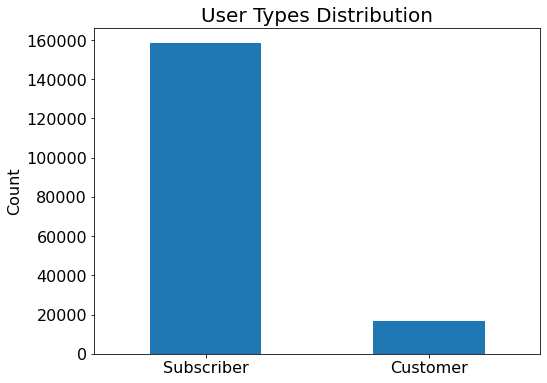

In [44]:
# plot a histogram of user types
df_clean['user_type'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('User Types Distribution', fontsize=20)
#plt.xlabel('User Type',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(fontsize=16)

### 2. Gender:

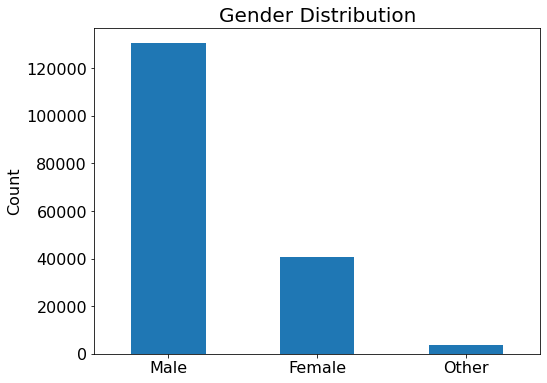

In [45]:
# plot a histgram of gender distribution
df_clean.member_gender.value_counts().plot(kind='bar',figsize=(8,6))
plt.title('Gender Distribution',fontsize=20)
plt.ylabel('Count',fontsize=16)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(fontsize=16);

### 3. Age:

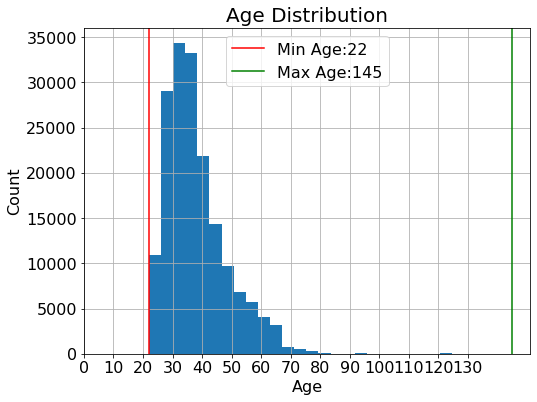

In [46]:
# plot the age histogram
df_clean.age.hist(bins=30,figsize=(8,6))
plt.xlabel('Age',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Age Distribution',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# change the xticker
plt.xticks(np.arange(0, 140, 10))
# plot a red line at the minum age
plt.axvline(df_clean.age.min(),color='red',label='Min Age:' + str(df_clean.age.min()))
plt.axvline(df_clean.age.max(),color='green',label='Max Age:' + str(df_clean.age.max()))
plt.legend(fontsize=16);  

In [47]:
# print the number of user betweeon 100 and 150 years old
print(df_clean[df_clean['age'] > 100]['age'].count())

75


## Station location: 

### 1. start stations location:

In [48]:
# print the top 10 popular start stations
df_clean['start_station_name'].value_counts().head(10).index

Index(['Powell St BART Station ', 'Market St at 10th St',
       'San Francisco Caltrain Station 2  ', 'Berry St at 4th St',
       'Montgomery St BART Station ', 'San Francisco Caltrain ',
       'San Francisco Ferry Building ', 'Howard St at Beale St',
       'Steuart St at Market St', 'The Embarcadero at Sansome St'],
      dtype='object')

In [79]:
# select the top 10 popular start station and store them in top_10_popular_start_station
top_10_popular_start_station = df_clean['start_station_name'].value_counts().head(10).index

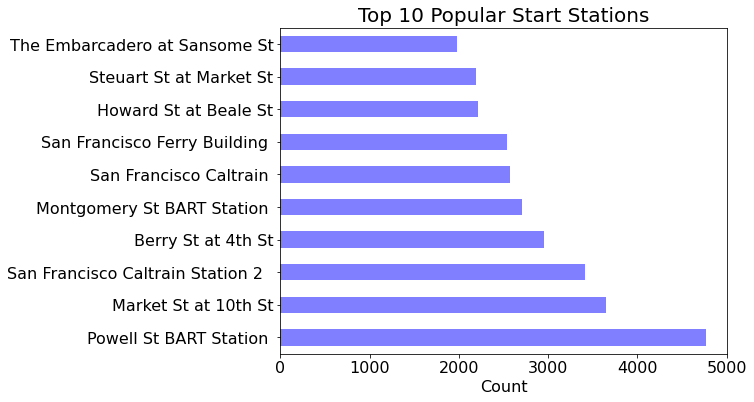

In [50]:
# plot the top 10 popular start stations in terms of count
df_clean.start_station_name.value_counts().head(10).plot(kind='barh', figsize=(8,6), color='blue',alpha=0.5)
plt.title('Top 10 Popular Start Stations',fontsize=20)
plt.xlabel('Count',fontsize=16)
#plt.ylabel('Start Station Name',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

### 2. end stations location:

In [51]:
# select the top 10 popular end station and store them in top_10_popular_end_station
top_10_popular_end_station = df_clean['end_station_name'].value_counts().head(10).index

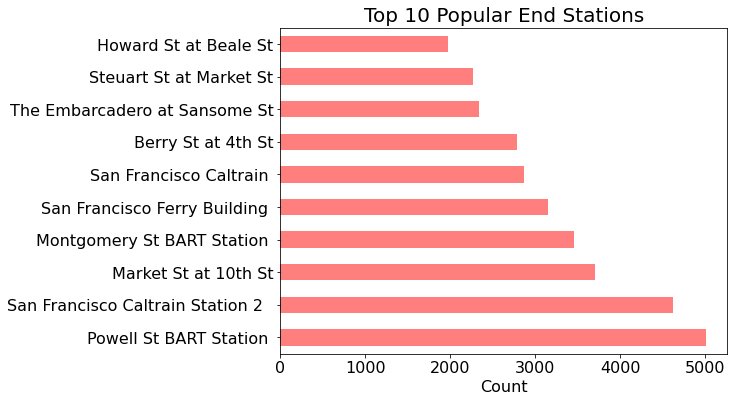

In [52]:
# plot the top 10 end stations in terms of count
df_clean.end_station_name.value_counts().head(10).plot(kind='barh', figsize=(8,6), color='red',alpha=0.5)
plt.title('Top 10 Popular End Stations',fontsize=20)
plt.xlabel('Count',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

### Top 10 station location

In [53]:
# select the top 10 popular station in both start and end station
top_10_popular_station_name = list(set(top_10_popular_start_station) & set(top_10_popular_end_station))

In [54]:
# print out the most popular start station
top_10_popular_station_name

['Howard St at Beale St',
 'Powell St BART Station ',
 'San Francisco Caltrain Station 2  ',
 'San Francisco Caltrain ',
 'The Embarcadero at Sansome St',
 'Steuart St at Market St',
 'Berry St at 4th St',
 'Montgomery St BART Station ',
 'San Francisco Ferry Building ',
 'Market St at 10th St']

In [55]:
# select the top 10 popular stations which is overlapped in top 10 start and end station
top_10_popular_station = df_clean[df_clean['start_station_name'].isin(top_10_popular_start_station)& 
         df_clean['end_station_name'].isin(top_10_popular_end_station)]

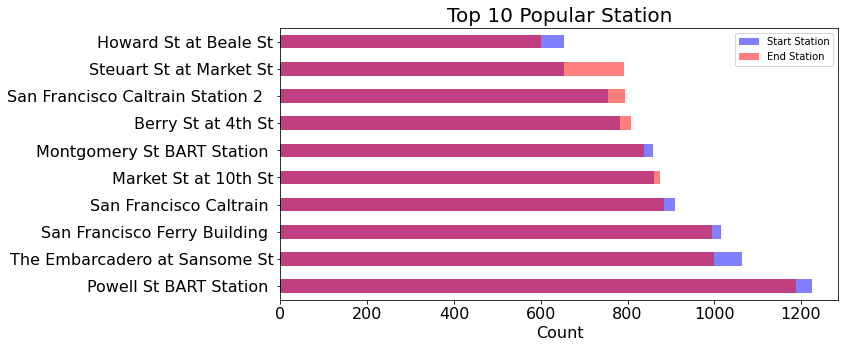

In [56]:
# plot the histogram of top 10 popular station in start and end station
top_10_popular_station.start_station_name.value_counts().head(10).plot(kind='barh', figsize=(12,10), alpha=0.5, 
                                                                       color='blue',label = 'Start Station')
top_10_popular_station.end_station_name.value_counts().head(10).plot(kind='barh', figsize=(10,5), alpha=0.5, 
                                                                       color='red',label = 'End Station')
plt.legend()
plt.title('Top 10 Popular Station',fontsize = 20)
plt.xlabel('Count',fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);

### Duration time 

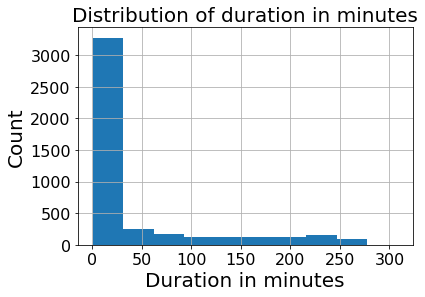

In [57]:
# plot the distribution of duration in minutes
df_clean['duration_min'].value_counts().hist(bins= 10)
plt.xlabel('Duration in minutes',fontsize= 20)
plt.ylabel('Count',fontsize= 20)
plt.title('Distribution of duration in minutes',fontsize= 20)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The univariate analysis reveals that user type, gender, and age are the main factors influencing bike usage. Male subscribers have higher ride counts compared to female customers. The majority of riders (between ages 22 and 46) prefer this shared bike service. The top 10 popular station locations, which serve as both start and end points, include San Francisco Caltrain (Townsend St at 4th St), Market St at 10th St, Montgomery St BART Station (Market St at 2nd St), Steuart St at Market St, Powell St BART Station (Market St at 5th St), Powell St BART Station (Market St at 4th St), Berry St at 4th St, San Francisco Ferry Building (Harry Bridges Plaza), and San Francisco Caltrain Station 2 (Townsend St at 4th St). 
For the distribution of duration in minutes, the majority of people ride the shared bike for less than 30 minutes.

>  For convenient comparison, the user's age is calculated by subtracting the member's birth year from the current year. This method allows us to easily compare ages across different users in data cleaning step.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The age distribution shows a wide range, spanning from 22 to 145 years old. Interestingly, there are 75 users whose age is over 100 years old.

> To facilitate comparison, I converted the 'duration_sec' to 'duration in minutes' in the data cleaning step.


## Bivariate Exploration

### 1. Duration and gender

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

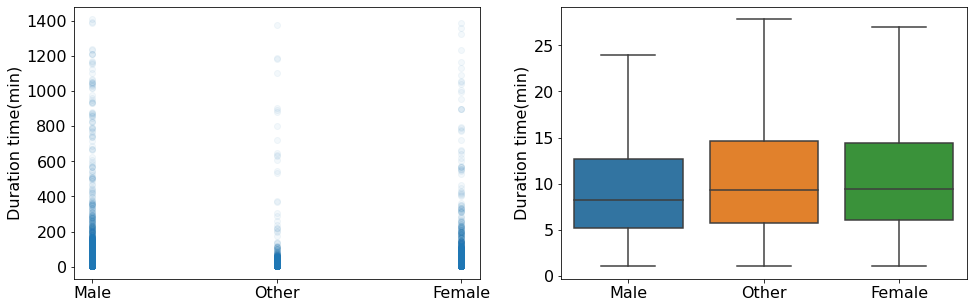

In [58]:
# plot a scatterplot of duration in different gender
plt.figure(figsize = [16, 5])
plt.subplot(1, 2, 1)
plt.scatter(data= df_clean, x='member_gender', y='duration_min', alpha= 1/20)
plt.ylabel('Duration time(min)',fontsize= 16)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
# plot a boxplot of duration in different gender
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='member_gender', y='duration_min', showfliers=False)
plt.ylabel('Duration time(min)',fontsize= 16)
plt.xlabel('')
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)

> Based on the two plots presented above, we can clearly observe variations in bike riding times among users of different genders. The scatter plot on the left indicates that the majority of bike rides for all three genders have durations below 200 minutes.

> Now, focusing on the zoomed-in bar plot on the right, we can see the distribution of riding durations for each gender. Surprisingly, the group with the longest duration is not male users, as one might expect from the count of male riders being higher. Instead, the blue bar representing male users shows that their median, first quantile, and third quartile riding times are the lowest compared to both the other genders. The orange bar represents another gender group that stands out. Their median riding duration is similar to that of female riders, at around 8 minutes, but their first quartile (approximately 14 minutes) is higher than that of the female group.

> In summary, the plots highlight the differences in bike riding times between genders, with the male group showing shorter durations on average, while another gender group displays longer riding durations compared to females.

### 2. Duration and user type 

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

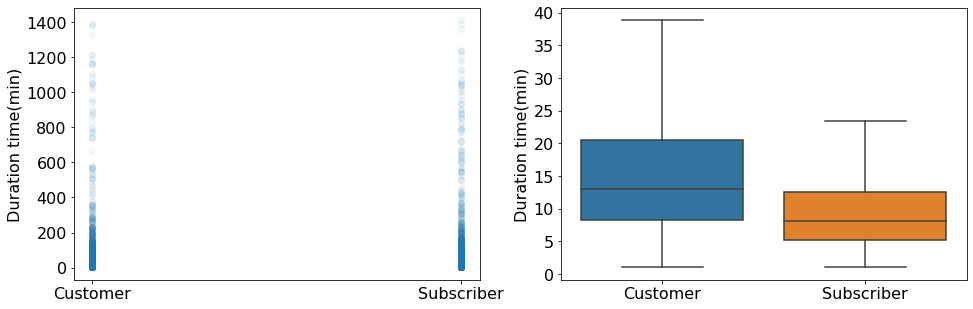

In [59]:
# plot a scatterplot of duration in different user type
plt.figure(figsize = [16, 5])
plt.subplot(1, 2, 1)
plt.scatter(data= df_clean, x='user_type', y='duration_min', alpha= 1/20)
plt.ylabel('Duration time(min)',fontsize= 16)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
# plot a boxplot of duration in different user type
plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
sb.boxplot(data=df_clean, x='user_type', y='duration_min', showfliers=False)
plt.ylabel('Duration time(min)',fontsize= 16)
plt.xlabel('')
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)

> The user type is the second factor influencing biking duration. The zoomed-in bar plot compares two groups: subscribers and customers. It clearly shows that customers significantly outnumber subscribers in terms of bike riding time. The blue bar, representing customers, consistently exceeds the subscribers' bar across the entire range of biking durations. Customers have a median riding duration of 13 minutes, a first quartile of over 20 minutes, and a third quartile of 7 minutes. On the other hand, the median riding duration for subscribers only reaches the third quartile value of customers.

### 3. Duration and age:

Text(0.5, 1.0, 'Duration vs. Age')

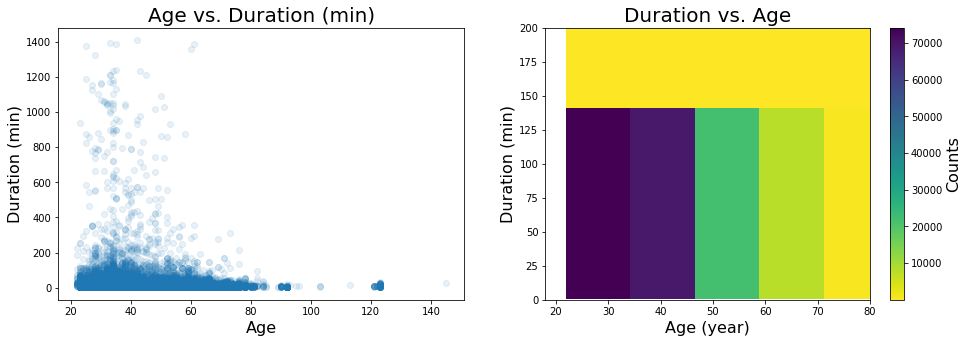

In [60]:
# plot the scatterplot of age vs. duration_min
plt.figure(figsize = [16, 5])
plt.subplot(1, 2, 1)
plt.scatter(data = df_clean, x = 'age', y = 'duration_min', alpha = 1/10)
plt.xlabel('Age',fontsize=16)
plt.ylabel('Duration (min)',fontsize=16)
plt.title('Age vs. Duration (min)',fontsize=20)
# plot the heatmap of age vs. duration_min
plt.subplot(1, 2, 2)
plt.hist2d(data = df_clean, x = 'age', y = 'duration_min',
            cmap = 'viridis_r', cmin = 0.5)
colorbar = plt.colorbar()
colorbar.set_label('Counts',fontsize=16)
plt.xlim(18, 80)
plt.ylim(0, 200)
plt.xlabel('Age (year)',fontsize=16)
plt.ylabel('Duration (min)',fontsize=16)
plt.title('Duration vs. Age',fontsize=20)

> Age variation is the last factor that affects the average riding time. The left figure indicates that the users' ages range maily from 22 to 80 years, with most bike rides having durations below 200 minutes.
On the right side, the heatmap shows that the highest number of users ride the shared bikes for around 140 minutes. Additionally, the largest number of users with ride durations over 7000 peoples are between 22 and 33 years old. The second largest user age group, spanning approximately 33 to 47 years old, consists of 6000 to 7000 users. Consequently, the impact of age on bike riding time appears to be relatively minor, while it has strongly influence on the number of users.

### 4. duration time and top 10 popular stations

In [61]:
# print out the columns: start_station_name, end_station_name
df_clean[['start_station_name','end_station_name']].head()

,start_station_name,end_station_name
0,Montgomery St BART Station,Commercial St at Montgomery St
2,Market St at Dolores St,Powell St BART Station
3,Grove St at Masonic Ave,Central Ave at Fell St
4,Frank H Ogawa Plaza,10th Ave at E 15th St
5,4th St at Mission Bay Blvd S,Broadway at Kearny


In [62]:
top_10_popular_station_name

['Howard St at Beale St',
 'Powell St BART Station ',
 'San Francisco Caltrain Station 2  ',
 'San Francisco Caltrain ',
 'The Embarcadero at Sansome St',
 'Steuart St at Market St',
 'Berry St at 4th St',
 'Montgomery St BART Station ',
 'San Francisco Ferry Building ',
 'Market St at 10th St']

In [63]:
# select the data whose start station name or end station name is in the top popular station list
df_clean_top_10_start = df_clean[df_clean['start_station_name'].isin(top_10_popular_station_name)]
df_clean_top_10_end = df_clean[df_clean['end_station_name'].isin(top_10_popular_station_name)]

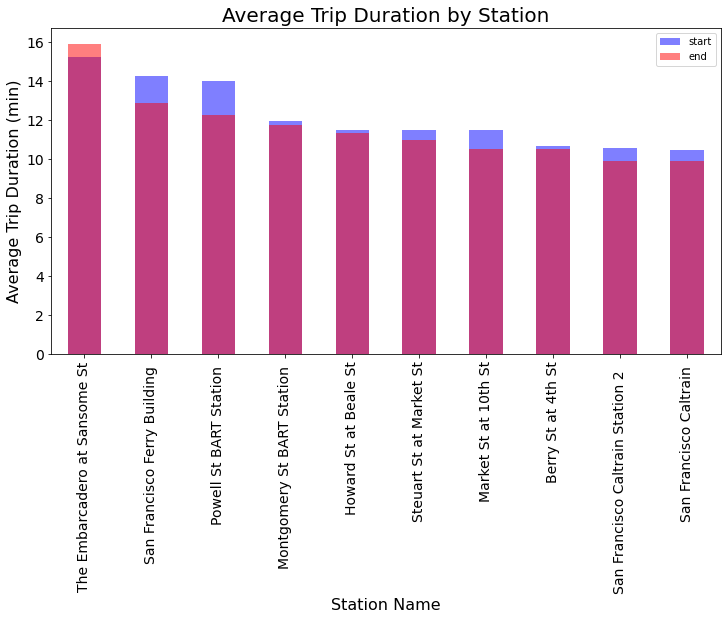

In [64]:
# plot the hisgram of duration_min based on the start and end station name
df_clean_top_10_start.groupby('start_station_name').duration_min.mean().sort_values(ascending=False).plot(kind='bar',color='blue', 
                                                                                                          alpha = .5,label='start',
                                                                                                          figsize=(12,6))
df_clean_top_10_end.groupby('end_station_name').duration_min.mean().sort_values(ascending=False).plot(kind='bar',color='red',
                                                                                                          alpha = .5, label='end',
                                                                                                          figsize=(12,6))
plt.title('Average Trip Duration by Station',fontsize=20)
plt.xlabel('Station Name',fontsize=16)
plt.ylabel('Average Trip Duration (min)',fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

In [65]:
# print top 10 average trip duration stations in bothe start and end stations
top_10_start_station_name = df_clean_top_10_start.groupby('start_station_name').duration_min.mean().sort_values(ascending=False)[:10].index.tolist()
top_10_end_station_name = df_clean_top_10_end.groupby('end_station_name').duration_min.mean().sort_values(ascending=False)[:10].index.tolist()
top_10_end_station_name = [x for x in top_10_end_station_name if x in top_10_start_station_name]
top_10_end_station_name

['The Embarcadero at Sansome St',
 'San Francisco Ferry Building ',
 'Powell St BART Station ',
 'Montgomery St BART Station ',
 'Howard St at Beale St',
 'Steuart St at Market St',
 'Market St at 10th St',
 'Berry St at 4th St',
 'San Francisco Caltrain Station 2  ',
 'San Francisco Caltrain ']

> The histogram displays the top 10 average trip duration stations for both start and end stations. These stations were selected from the overall top 10 popular stations. The following are the stations: 'The Embarcadero at Sansome St', 'San Francisco Ferry Building ','Powell St BART Station ','Montgomery St BART Station ','Howard St at Beale St','Steuart St at Market St','Market St at 10th St','Berry St at 4th St','San Francisco Caltrain Station 2  ','San Francisco Caltrain '.  
Among the mentioned stations, 'The Embarcadero at Sansome St' stands out with the highest average riding time, surpassing 14 minutes. Interestingly, for this station, the end station's average riding time is slightly higher than the start station's average duration.
On the contrary, the station with the lowest average duration is 'San Francisco Caltrain', with an average riding time just slightly below 12 minutes. The average riding times for the remaining stations are all around 12 minutes. This suggests that the station's location has a relatively minor effect on the average riding time, as most stations have similar durations.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Based on the analysis of factors affecting bike riding duration, we observed distinct variations among different genders, with males having shorter durations and another gender group showing longer durations compared to females. User type is another significant factor, as customers significantly outnumber subscribers in terms of bike riding time, with customers having longer median riding durations. Age variation has a relatively minor impact on riding time, with the highest number of users riding for around 140 minutes, and longer ride durations mainly concentrated in the 22 to 33-year-old age group. Station location seems to have a relatively minor effect on average riding time, as most top 10 stations have similar durations. In summary, gender and user type play more prominent roles in influencing bike riding durations, while age and station location have less impact on average riding times. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - In the analysis of station locations, the top 10 average stations, which are also listed in top 10 popular stations, demonstrate variations in riding duration are minor. All stations average riding time is around 12 min.
> - The observations for different factors in terms of the number of users and duration time can yield different results.

## Multivariate Exploration

### 1. Duration and individual counts relation based on gender:

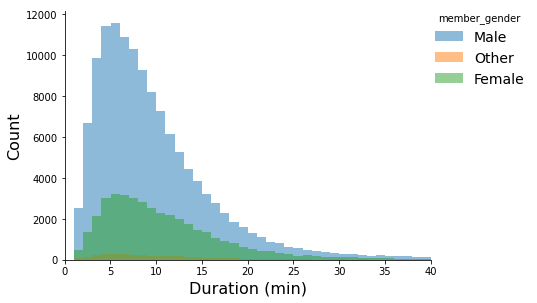

In [66]:
g = sb.FacetGrid(data=df_clean, hue='member_gender', height=4, aspect=1.5)
g.map_dataframe(plt.hist, x='duration_min', bins=np.arange(df_clean['duration_min'].min(), df_clean['duration_min'].max() + 1, 1), alpha=0.5)
g.add_legend(fontsize=14, loc='upper right')
plt.xlabel('Duration (min)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim(0, 40)
plt.show()

> The histogram analysis above suggests that gender strongly influences the number of users but has a relatively minor effect on the duration of bike rides. The blue bars, representing male users, dominate the chart, with a peak count of around 12,000 users and durations in the range of 5 to 10 minutes. The green and orange bars, representing female and other genders, respectively, also show peaks in this duration range, but with lower user counts. Therefore, it is evident that gender has a more significant impact on the number of users than on the duration of bike rides.

### 2.  Duration and individual counts relation based on user type:

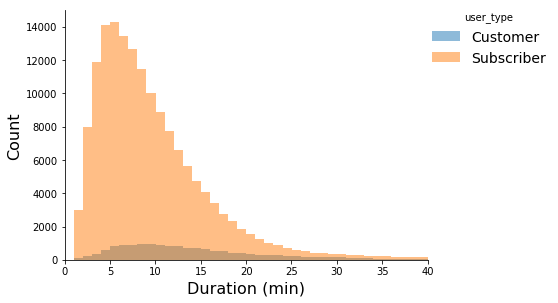

In [67]:
g = sb.FacetGrid(data=df_clean, hue='user_type', height=4, aspect=1.5)
g.map_dataframe(plt.hist, x='duration_min', bins=np.arange(df_clean['duration_min'].min(), df_clean['duration_min'].max() + 1, 1), alpha=0.5)
g.add_legend(fontsize=14, loc='upper right')
plt.xlabel('Duration (min)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim(0, 40)
plt.show()

The bar plot depicting the relationship between individual count, duration, and user type reveals that subscribers constitute the majority of users. Additionally, the peak duration time, representing the longest riding periods, falls within the range of 5 to 10 minutes for both customer and subscriber groups.

### 3. Duration and counts relation based on age:  

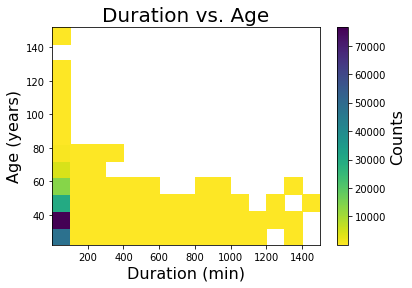

In [68]:
bins_x = np.arange(df_clean['duration_min'].min(), df_clean['duration_min'].max()+100, 100)
bins_y = np.arange(df_clean['age'].min(), df_clean['age'].max()+10, 10)

plt.hist2d(data = df_clean, x = 'duration_min', y = 'age',
           cmin=0.5, cmap='viridis_r', bins=[bins_x,bins_y])
colorbar = plt.colorbar()
colorbar.set_label('Counts',fontsize=16)
plt.xlabel('Duration (min)',fontsize=16)
plt.ylabel('Age (years)',fontsize=16)
#plt.xlim(0, 200)
plt.title('Duration vs. Age',fontsize=20);

> The heat map provides an overview of the distribution relating to the duration, number of users, and age demographics. The majority of users, exceeding 1000 individuals, fall within the age range of 22 to 70 years old, and their riding durations generally remain below 100 minutes. Notably, the largest user group comprises individuals aged between 30 and 40, with a significant count exceeding 7000. Interestingly, there exists a small group of users whose reported age exceeds 140 years old. In summary, age distribution has a substantial influence on individual counts but exerts a lesser effect on duration.

### 4. the duration, individual count based on Top 10 popular stations

In [69]:
### Top 10 popular stations, duration and count
top_10_popular_station_name

['Howard St at Beale St',
 'Powell St BART Station ',
 'San Francisco Caltrain Station 2  ',
 'San Francisco Caltrain ',
 'The Embarcadero at Sansome St',
 'Steuart St at Market St',
 'Berry St at 4th St',
 'Montgomery St BART Station ',
 'San Francisco Ferry Building ',
 'Market St at 10th St']

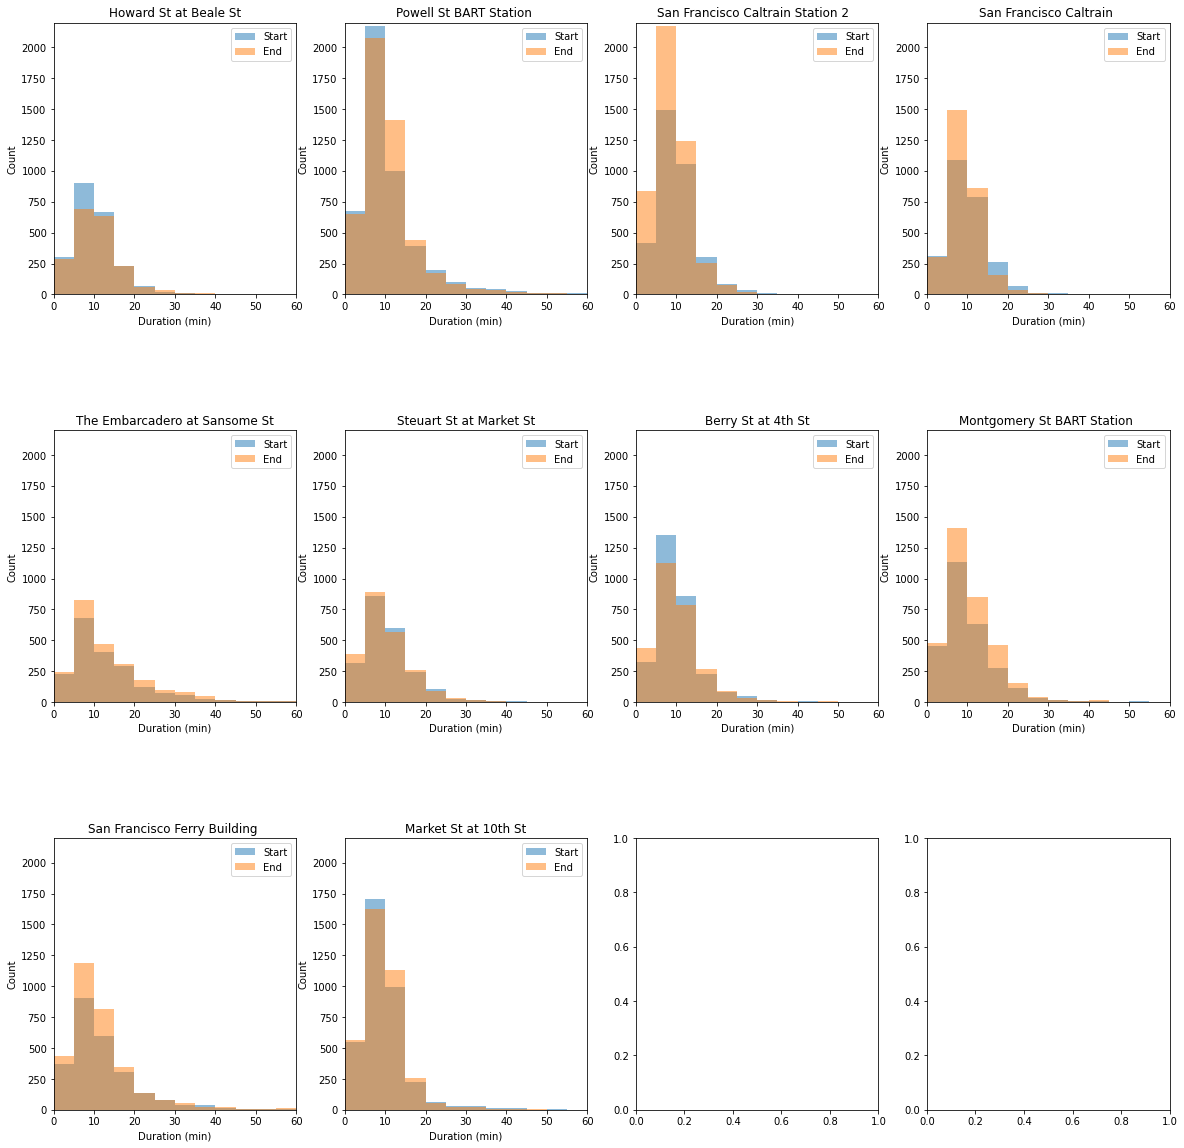

In [70]:
# Create a 4x4 matrix of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
bin_edges = np.arange(0, df_clean['duration_min'].max()+5, 5)
# Loop through each station in the top 10 list and plot the histograms in the corresponding subplot
for i, station in enumerate(top_10_popular_station_name):
    row = i // 4
    col = i % 4

    axes[row, col].hist(df_clean[df_clean['start_station_name'] == station].duration_min,
                        bins=bin_edges, alpha=0.5, label='Start', range=(0, 60))
    axes[row, col].hist(df_clean[df_clean['end_station_name'] == station].duration_min,
                        bins=bin_edges, alpha=0.5, label='End', range=(0, 60))

    axes[row, col].legend()
    axes[row, col].set_xlabel('Duration (min)')
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_title(f'{station}')
    axes[row, col].set_xlim(0, 60)
    axes[row, col].set_ylim(0, 2200)

# Show the plot
plt.show()

> 
The complex bar plot matrix, based on the top 10 popular stations, provides an overview of the distribution of the number of users against duration time, both as start stations and end stations. The y-axis shows a wide variation in individual counts across different stations, with the highest values ranging from around 750 to over 2000 people. The x-axis represents duration time, which is primarily concentrated in the 0 to 30 minute range.

### 5. Impact of user type, gender on duration:

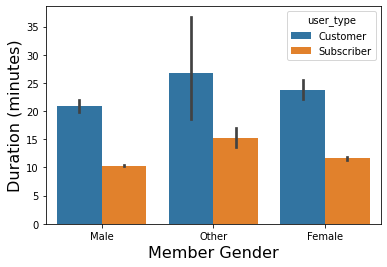

In [71]:
sb.barplot(data = df_clean, x = 'member_gender', y = 'duration_min', hue = 'user_type')
plt.xlabel('Member Gender', fontsize=16)
plt.ylabel('Duration (minutes)', fontsize=16)
plt.show()

> The bar plot provides a result, similar to a comprehensive summary derived from the boxplot analysis of ride durations categorized by user type and gender. Notably, the "customer other" group exhibits the longest riding duration, averaging around 25 minutes.

### 6.Impact of Station Location on Average Riding Time Across Different User Types

#### Start station name:

In [72]:
#Calculate average riding time for each station location and user type
avg_riding_time = df_clean_top_10_start.groupby(['start_station_name', 'user_type'])['duration_min'].mean().reset_index()

In [73]:
avg_riding_time

,start_station_name,user_type,duration_min
0,Berry St at 4th St,Customer,19.044388
1,Berry St at 4th St,Subscriber,10.672003
2,Howard St at Beale St,Customer,15.383196
3,Howard St at Beale St,Subscriber,10.322999
4,Market St at 10th St,Customer,19.903869
5,Market St at 10th St,Subscriber,9.934783
6,Montgomery St BART Station,Customer,30.677646
7,Montgomery St BART Station,Subscriber,10.384213
8,Powell St BART Station,Customer,29.124638
9,Powell St BART Station,Subscriber,12.158878


In [74]:
# Get the order of station locations based on average riding time
order_of_locations = avg_riding_time.groupby('start_station_name')['duration_min'].mean().sort_values().index

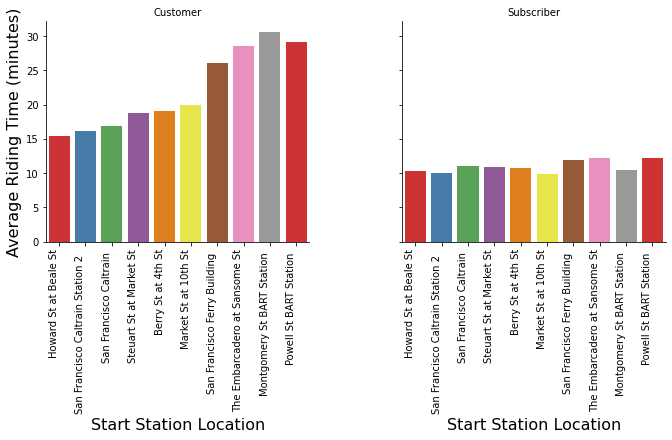

In [75]:
# Create a FacetGrid and plot the bar plots
g = sb.FacetGrid(data=avg_riding_time, col='user_type', col_wrap=3, height=4, aspect=1.2)
g.map(sb.barplot, 'start_station_name', 'duration_min', order=order_of_locations, palette='Set1')
g.set_titles('{col_name}', fontsize=16)
g.set_axis_labels('Start Station Location', 'Average Riding Time (minutes)', fontsize=16)
g.set_xticklabels(rotation=90, ha='right')
plt.show()

#### End station name:

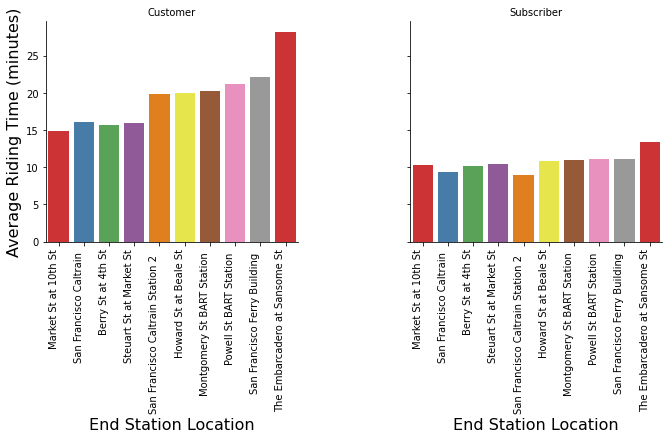

In [76]:
#Calculate average riding time for each station location and user type
avg_riding_time = df_clean_top_10_end.groupby(['end_station_name', 'user_type'])['duration_min'].mean().reset_index()
# Get the order of station locations based on average riding time
order_of_locations = avg_riding_time.groupby('end_station_name')['duration_min'].mean().sort_values().index
# Create a FacetGrid and plot the bar plots
g = sb.FacetGrid(data=avg_riding_time, col='user_type', col_wrap=3, height=4, aspect=1.2)
g.map(sb.barplot, 'end_station_name', 'duration_min', order=order_of_locations, palette='Set1')
g.set_titles('{col_name}', fontsize=16)
g.set_axis_labels('End Station Location', 'Average Riding Time (minutes)', fontsize=16)
g.set_xticklabels(rotation=90, ha='right')
plt.show()

> The average riding time at the top 10 popular station locations shows notable differences between customer and subscriber user groups. Surprisingly, the customer group exhibits higher average riding times compared to the subscribers at each station, contrary to our initial expectations. On average, the riding time for customers exceeds 15 minutes, while subscribers typically have around 10 minutes of average riding time.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Initially, our analysis focused on examining the relationship between duration and individual count concerning gender, user type, age, and the top 10 popular stations. We observed that these factors significantly impact the number of users but have relatively little effect on the ride duration, which remains concentrated within specific ranges.
Surprisingly, when considering the factors affecting duration, the results contradicted the conventional expectation. It was found that the customer group displayed longer average riding times compared to subscribers. This unexpected finding challenges the common assumption and highlights the importance of considering various factors when interpreting ride duration data.

### Were there any interesting or surprising interactions between features?

> - The riding durations of the majority of users, falling within the age range of 22 to 70 years old, remain below 100 minutes, while a small group of users with reported ages exceeding 140 years old also exhibit similar ride durations.
> - At the top 10 popular station locations, the average riding time varies significantly between customer and subscriber user groups, with the customer group displaying higher average riding times than the subscribers, contrary to expectations.

## Conclusions
>The purpose of this analysis is to investigate how users' personal information (age, gender, and user type) and station locations affect their riding duration and number of. Based on the plot and analysis, we can draw the following conclusions: these factors significantly impact the number of users but have relatively little effect on the ride duration, which remains concentrated within specific ranges. Moreover, gender and user type significantly influence the users' riding time. However, age does not seem to be a determining factor. Additionally, station location is another important factor that affects users' riding duration.
